In [1]:
import cv2
import matplotlib.pyplot as plt
import face_recognition
import numpy as np
from os.path import join
import glob
import pickle

In [2]:
models_dir = 'models'

In [3]:
cv2.namedWindow("preview")
vc = cv2.VideoCapture(0)

In [12]:
def get_nodes_for_encoding(face_encoding):
    
    val = np.linalg.norm(face_encoding)
    node_1 = int(round((val - 1) * 10))
    node_2 = node_1 - 1;
    return (node_1, node_2)

In [5]:
def saveObject(train_image_encoding, train_image_file):
    
    with open(join(models_dir, train_image_file + '.pkl'), 'wb') as output_file:
        pickle.dump(train_image_encoding, output_file, pickle.HIGHEST_PROTOCOL)

In [6]:
def getSavedModels(models_dir):

    model_files = glob.glob(join(models_dir, "*.pkl"))
    print(model_files)
    train_image_encodings = []
    for model_file in model_files:
        with open(model_file, 'rb') as input_file:
            train_image_encoding = pickle.load(input_file)
            train_image_encodings.append(train_image_encoding)
    return train_image_encodings                

### Train the model

In [7]:
train_images_dir = join("images", "train")
train_image_files = glob.glob(join(train_images_dir, "*.jpg"))

train_image_encodings = []
for train_image_file in train_image_files:
    train_image = face_recognition.load_image_file(train_image_file)
    train_image_encoding = face_recognition.face_encodings(train_image)
    # print(train_image_file)
    # print(train_image_encoding)
    saveObject(train_image_encoding, train_image_file.split("/")[-1].split(".")[0])
    if len(train_image_encoding) > 0:
        train_image_encodings.append(train_image_encoding[0])
    else:
        print(train_image_file)

In [8]:
THRESHOLD = 0.5

def get_image_name_from_path(image_path):
    output_image_name = image_path.split("/")[-1]
    person_name = output_image_name.split(".")[0]
    return person_name

def detect_person(rgb_frame):
    
    model_files = glob.glob(join(models_dir, "*.pkl"))
    
    train_image_encodings = []
    for model_file in model_files:
        with open(model_file, 'rb') as input_file:
            train_image_encoding = pickle.load(input_file)
            print(model_file)
            print(np.linalg.norm(train_image_encoding[0]))
            train_image_encodings.append(train_image_encoding[0])
    
    face_locations = face_recognition.face_locations(rgb_frame)
    face_encodings = face_recognition.face_encodings(rgb_frame, face_locations)
    
    print("Encodings from image")
    for (top, right, bottom, left), face_encoding in zip(face_locations, face_encodings):
        
        matches = face_recognition.compare_faces(train_image_encodings, face_encoding)
        print(get_nodes_for_encoding(face_encoding))
        name = "Unknown"
        # print(matches)

        if True in matches:
            first_match_index = matches.index(True)
            name = get_image_name_from_path(model_files[first_match_index])

        cv2.rectangle(rgb_frame, (left, top), (right, bottom), (0, 0, 255), 2)

        cv2.rectangle(rgb_frame, (left, bottom), (right, bottom + 50), (0, 0, 255), cv2.FILLED)
        font = cv2.FONT_HERSHEY_DUPLEX
        cv2.putText(rgb_frame, name, (left + 6, bottom + 40), font, 1.5, (255, 255, 255), 1)
    
    plt.rcParams['figure.figsize'] = [10, 5]
    plt.imshow(rgb_frame)
    plt.show()

In [9]:
def get_frame_from_camera():
    retval, im = vc.read()
    return im

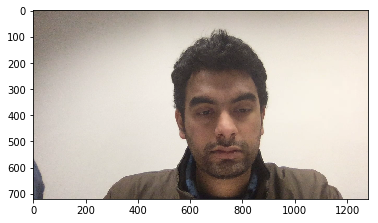

In [10]:
frame = get_frame_from_camera()
rgb_frame = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
plt.imshow(rgb_frame)
plt.show()

models/Kritka.pkl
1.47174938649
models/obama.pkl
1.40028237564
models/amol.pkl
1.41303097784
models/ruzan.pkl
1.26307783771
models/thomas.pkl
1.3204636864
Encodings from image
(3, 2)


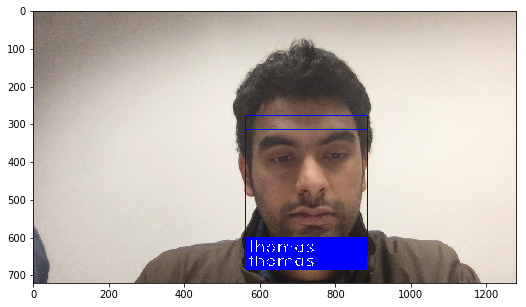

In [13]:
detect_person(rgb_frame)